In [38]:
import pyfesom2 as pf
import xarray as xr
import os
import pandas as pd
from collections import OrderedDict
from itertools import product
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib import cm
import numpy as np

In [39]:
# parameters cell
meshpath = "/Users/nkolduno/PYTHON/DATA/core2_meanz_mesh/"
abg = [50, 15, -90]
input_paths = [
    "/Users/nkolduno/PYTHON/DATA/output_7_8/",
    "/Users/nkolduno/PYTHON/DATA/output_7_10",
]
input_names = ['control', 'opt1']
years = range(1978, 1986)
figsize=(10, 5)
region = "Global Ocean"
levels = [-20, 20, 41]
ofile = None

In [40]:
if input_names is None:
    input_names = []
    for run in input_paths:
        run = os.path.join(run, '')
        input_names.append(run.split('/')[-2])

In [41]:
mesh = pf.load_mesh(meshpath, abg=abg, 
                    usepickle=True, usejoblib=False)

/Users/nkolduno/PYTHON/DATA/core2_meanz_mesh/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /Users/nkolduno/PYTHON/DATA/core2_meanz_mesh/pickle_mesh_py3_fesom2


In [42]:
xmoc = OrderedDict()
# data_reference = pf.get_data(reference_path, variable, reference_years, mesh, depth = depth, silent=True)
for exp_path, exp_name  in zip(input_paths, input_names):
    xmoc[exp_name] = {}
    xmoc[exp_name]['data'] = pf.get_data(exp_path, 'w', years, mesh, how='mean', compute=False, silent=True)

In [43]:
stream_func = {}
mask=pf.get_mask(mesh, region)
for key, value in xmoc.items():
    stream_func[key] = {}
    lats, moc = pf.xmoc_data(mesh, value['data'], mask = mask)
    stream_func[key]['data'] = moc
    stream_func[key]['lats'] = lats

In [44]:
def data_to_plot(plotds):
    plot_data = []
    plot_names = []
    for key, value in plotds.items():
        plot_data.append(value['data'])
        plot_names.append(key)
                
    return plot_data, plot_names

In [45]:
plot_data, plot_names = data_to_plot(stream_func)

<Figure size 720x216 with 0 Axes>

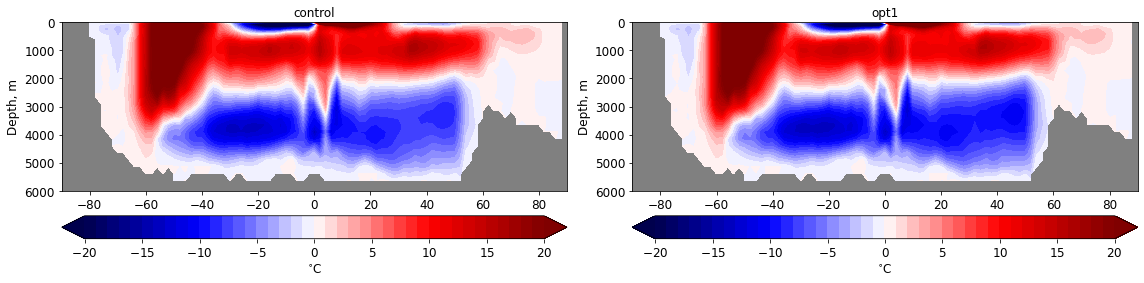

In [47]:
plt.figure(figsize=figsize)
pf.plot_xyz(mesh, plot_data, xvals=lats, maxdepth=7000, cmap=cm.seismic, levels = levels, 
             facecolor='gray', title=input_names, ncols=columns)
if ofile is not None:
    plt.savefig(ofile)
    os.system(f'convert {ofile} -trim {ofile}_trimmed.png')
    os.system(f'mv {ofile}_trimmed.png {ofile}')